# Homework 8 writeup solutions

## Name: Zach Gendreau

## Problem 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Load in the image of Olive's perfect paws.

In [ ]:
A = cv2.imread('olive.jpg', 0) # Remove the 0 if you want 
                               # to see the color version!

## Part (a) - 2x2 grid

Text(0.5, 1.0, 'Rank 226 approx')

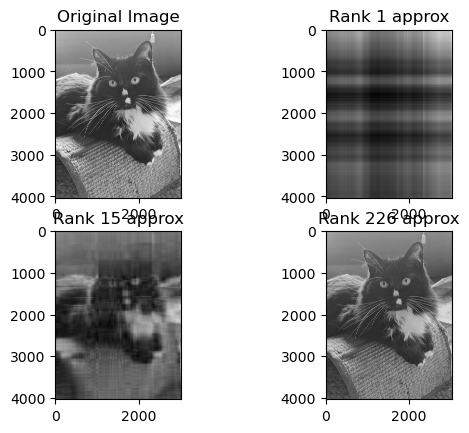

In [23]:
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(A, cmap='gray')
ax[0,0].set_title('Original Image')

U, S, Vt = np.linalg.svd(A, full_matrices=False) # Vt = V transpose

## Rank 1 approximation 
S_mat = np.diag(S)
rank_1 = (U[:, 0:1]@S_mat[0:1, 0:1])@Vt[0:1, :]

ax[0,1].imshow(rank_1, cmap='gray')
ax[0,1].set_title('Rank 1 approx')

## Rank 10 approximation 
rank_15 = (U[:, 0:15]@S_mat[0:15, 0:15])@Vt[0:15, :]

ax[1,0].imshow(rank_10, cmap='gray')
ax[1,0].set_title('Rank 15 approx')

total_energy = np.sum(S)
perc = 0
rank = 15
while (perc < 0.75):
    rank += 1
    values = np.sum(S[:rank])
    perc = values/total_energy

## Rank r approximation 
rank_r = (U[:, 0:rank]@S_mat[0:rank, 0:rank])@Vt[0:rank, :]

ax[1,1].imshow(rank_r, cmap='gray')
ax[1,1].set_title('Rank ' + str(rank) + ' approx')

## Part b - Calculate the total number of pixels for the image and its approximation.

In [30]:
width, height = A.shape
print('Full image: ' + str(width*height) + ' pixels')
rank_r_store = width*rank + rank + height*rank
print('Rank ' + str(rank) + ' image: ' + str(rank_r_store) + ' pixels')

Full image: 12192768 pixels
Rank 226 image: 1594882 pixels


## Part c - Discuss

In [31]:
print(str(width*height/rank_r_store))

7.644934233379021


From this ratio, we know that the original image stores more than 7 times the number of points than the rank 226 (75% energy) approximation. This means that the compressed image is much more efficient, storage wise, than the original image. Also, the displays above show that the 226 approximation looks somewhat similar to the original image (minimal distortion)